# Семинар 13: Обучение без учителя.

В задачах обучения с учителем требовалось восстановить отображение $f: X \rightarrow Y$ из множества $X$ в $Y$, причем на некотором конечном подмножестве $\hat{X}$ это отображение было задано в виде ответов $\hat{Y}$.

В отличие от обучения с учителем, в задачах обучения без учителя эти правильные ответы отсутствуют. В таких задачах требуется понять, как как связаны между собой объекты из нашей выборки $X$.

## Кластеризация.

Одним из самых часто применяемых методов обучения без учителя является _кластеризация_. Задача кластеризации состоит в разбиении множества исходных объектов на подмножества близких по свойствам объектов. Понятие _близости_ формализуется при помощи задания _метрики_, или расстояния между объектами $\rho\left(x_i,x_j\right)$. Мы познакомимся с двумя алгоритмами кластеризации.

Метрика — функция, задающая расстояние в метрическом пространстве. Как мы помним из курса линейной алгебры, она должна удовлетворять трём аксиомам:

1. $\rho(x, y) \geq 0, \rho(x, y) = 0 \Leftrightarrow x = y;$
2. $\rho(x, y) = \rho (y, x);$
3. $\rho(x, y) \leq \rho(x, z) + \rho(z, y).$



### Метод k-means.

Познакомимся с одним из наиболее известных алгоритмов кластеризации - _k-means_ или _k средних_. 

Алгоритм метода выглядит примерно следующим образом:

1. Случайным образом выбираются k точек $x_k \in X$, в дальнейшем будем называть их центрами кластеров (центроидами);

2. Для каждой точки $x_i \in X$ вычисляется $\rho\left(x_i,x_k\right)$, после чего ей ставится в соответствие  ближайший к ней центр кластера. Совокупность точек, соответствующих центру $x_k$ называется кластером;

3. Вычисляются средние взвешенные точек (центры масс), принадлежащих к определённому кластеру. Эти значения становятся новыми центрами кластеров;

4. Шаги 2 и 3 повторяются до тех пор, пока пересчёт центров кластеров будет существенно менять местоположение кластеров. Как только высчитанные центры кластеров совпадут с предыдущими, алгоритм будет окончен.

Следует иметь в виду, что этот алгоритм хорошо работает только для нормальных выборок, причем кластеры не должны существенно перекрываться.

Недостатком алгоритма является то, что число кластеров в нем - гиперпараметр, т.е. должно быть задано изначально.


Реализуем алгоритм KMeans методами пакета sklearn.

Загрузим необходимые библиотеки:

In [66]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Сформируем данные при помощи подпакета make_blobs. Он создает данные, распределенные по нормальному закону. По умолчанию число признаков = 2, кластеров 3. Более подробно см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

In [107]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150)#n_samples - задаёт количество элементов в датасете

Формируем датафрейм из данных X.

In [108]:
df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1]},
                      columns=['x1', 'x2'])
df.head()

,x1,x2
0,1.986391,0.851084
1,3.138602,0.166583
2,0.191787,-0.847695
3,1.810305,-0.908130
4,-5.561773,-9.748513


Задача заключается в разбиении этих данных на кластеры.

Для начала визуализируем данные:

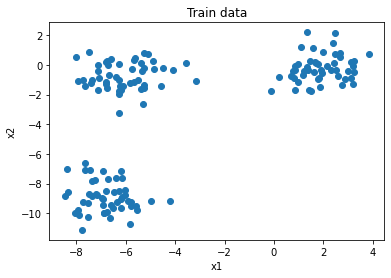

In [109]:
plt.scatter(df['x1'], df['x2'])

plt.xlabel('x1')
plt.ylabel('x2')

plt.title('Train data')

plt.show()

Видим, что число кластеров - три.

Создадим объект k средних с тремя кластерами:

In [110]:
model = KMeans(n_clusters=3)

Прежде чем приступить к кластеризации, отмасштабируем данные с помощью `MinMaxScaler`:

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(df), columns=['x1', 'x2'])

Снова визуализируем данные:

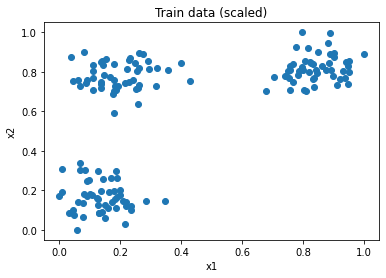

In [112]:
plt.scatter(train_scaled['x1'], train_scaled['x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Train data (scaled)')
plt.show()

Перейдём к кластеризации. С помощью метода `.fit_predict` можно обучить модель и предсказать метки кластеров на входных данных:

In [113]:
train_labels = model.fit_predict(train_scaled)

print(train_labels)

[2 2 2 2 1 0 1 0 0 0 0 1 2 0 2 1 1 1 2 0 0 2 0 1 1 1 0 2 1 0 1 2 0 0 0 1 0
 1 2 2 2 0 1 0 1 0 0 2 0 2 1 1 1 2 2 1 2 1 1 1 1 2 1 0 1 0 2 0 2 1 1 2 2 2
 2 0 2 1 0 0 0 2 1 2 2 0 1 1 1 1 1 2 0 1 0 0 0 0 2 2 2 2 2 0 2 0 1 1 2 1 0
 1 2 0 2 2 0 0 0 1 0 1 1 0 2 2 2 1 0 1 1 1 0 2 2 2 0 0 1 2 2 1 1 1 2 0 0 0
 2 0]


С помощью атрибута `.cluster_centers_` можно получить получившиеся в результате работы алгоритма центры кластеров. Чтобы изобразить эти центры на плоскости, воспользуемся методом `scaler.inverse_transform`, который преобразует отмасштабированные значения обратно в сырые. Центры на графике пометим красными ромбами. Кроме того, покрасим объекты из разных кластеров в разные цвета для наглядности.

Text(0.5, 1.0, 'Train data')

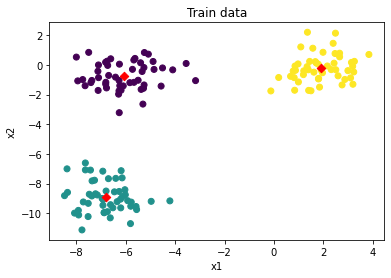

In [114]:
centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(df['x1'], df['x2'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel('x1')
plt.ylabel('x2')

plt.title('Train data')

## Проверка правильности предположения о количестве кластеров.

Основная проблема алгоритма k-means в том, что нам нужно заранее знать количество кластеров. Однако, в реальности это не всегда бывает возможно. Количество кластеров можно оценить, используя величину _inertia_. Эта величина равна сумме квадратов расстояний от объектов до центров их кластеров. Чем лучше кластеризация, тем меньше эта величина. Кроме того, она уменьшается с увеличением числа кластеров (она равна 0, если кластеров столько же, сколько объектов), поэтому нужно соблюдать баланс между количеством кластеров, которое нам подходит, и величиной inertia, чтобы число кластеров было разумным.

In [115]:
model.inertia_

1.6636405225724178

Посчитаем эту величину на наших данных при различном количестве кластеров.

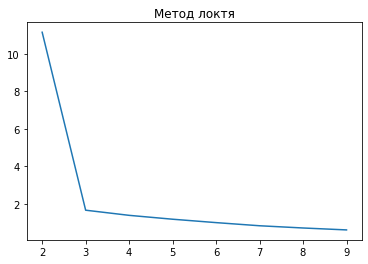

In [116]:
inertias = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 10), inertias)

plt.title('Метод локтя')

plt.show()

Мы видим сильное снижение inertia при переходе от 2 к 3 кластерам, а дальше идёт более плавное уменьшение. Это означает, что 3 - адекватное число кластеров. Такой подход называется _методом локтя_.